##### EXAM ATTENDANCE ANALYSIS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("50_Students_5_Days_Exam_Attendance.csv")
df.head()

,Student_ID,Student_Name,Subject,Exam_Type,Exam_Date,Attendance_Status,Reason_for_Absence
0,S001,Aarav Sharma,Science,Final,2025-12-15,Absent,Family Emergency
1,S002,Rohan Verma,Science,Final,2025-12-15,Present,NaN
2,S003,Aditya Singh,Science,Final,2025-12-15,Present,NaN
3,S004,Kunal Gupta,Science,Final,2025-12-15,Present,NaN
4,S005,Rahul Mehta,Science,Final,2025-12-15,Present,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Student_ID          250 non-null    object
 1   Student_Name        250 non-null    object
 2   Subject             250 non-null    object
 3   Exam_Type           250 non-null    object
 4   Exam_Date           250 non-null    object
 5   Attendance_Status   250 non-null    object
 6   Reason_for_Absence  55 non-null     object
dtypes: object(7)
memory usage: 13.8+ KB


In [ ]:
df.describe(include="all")

,Student_ID,Student_Name,Subject,Exam_Type,Exam_Date,Attendance_Status,Reason_for_Absence
count,250,250,250,250,250,250,55
unique,50,50,5,1,5,2,4
top,S001,Aarav Sharma,Science,Final,2025-12-15,Present,Transportation Issue
freq,5,5,50,250,50,195,18


In [ ]:
total_students = df['Student_ID'].nunique()
total_subjects = df['Subject'].nunique()
total_days = df['Exam_Date'].nunique()

print("Total Students:", total_students)
print("Total Subjects:", total_subjects)
print("Total Exam Days:", total_days)


Total Students: 50
Total Subjects: 5
Total Exam Days: 5


In [ ]:
attendance_count = df['Attendance_Status'].value_counts()
attendance_count

,count
Attendance_Status,
Present,195
Absent,55


In [ ]:
subject_summary = (
    df.groupby('Subject')['Attendance_Status']
    .value_counts()
    .unstack(fill_value=0)
)

subject_summary['Total'] = subject_summary.sum(axis=1)
subject_summary

Attendance_Status,Absent,Present,Total
Subject,,,
Computer Science,6,44,50
English,12,38,50
Mathematics,14,36,50
Science,10,40,50
Social Studies,13,37,50


In [ ]:
date_summary = (
    df.groupby('Exam_Date')['Attendance_Status']
    .value_counts()
    .unstack(fill_value=0)
)

date_summary

Attendance_Status,Absent,Present
Exam_Date,,
2025-12-15,10,40
2025-12-16,14,36
2025-12-17,12,38
2025-12-18,13,37
2025-12-19,6,44


In [ ]:
subject_summary['Absentee_Percentage'] = (
    subject_summary['Absent'] / subject_summary['Total'] * 100
)

subject_summary

Attendance_Status,Absent,Present,Total,Absentee_Percentage
Subject,,,,
Computer Science,6,44,50,12.0
English,12,38,50,24.0
Mathematics,14,36,50,28.0
Science,10,40,50,20.0
Social Studies,13,37,50,26.0


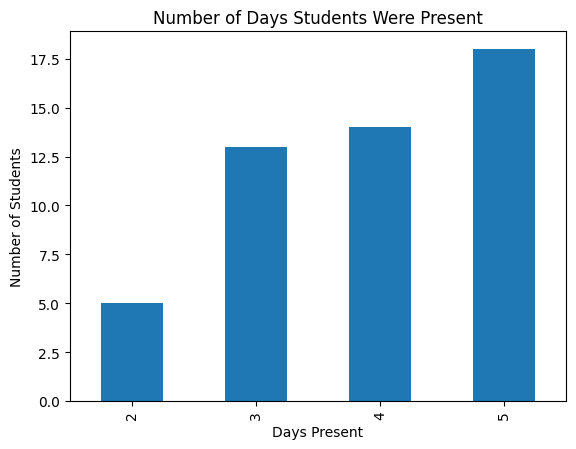

In [28]:
student_presence = (
    df[df['Attendance_Status'] == 'Present']
    .groupby('Student_Name')
    .size()
)

student_presence.value_counts().sort_index().plot(
    kind='bar',
    title='Number of Days Students Were Present'
)

plt.xlabel('Days Present')
plt.ylabel('Number of Students')
plt.show()

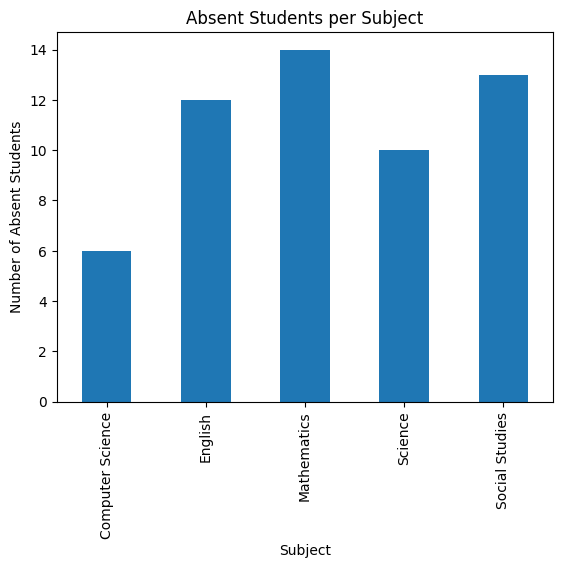

In [ ]:
subject_summary['Absent'].plot(kind='bar', title='Absent Students per Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Absent Students')
plt.show()

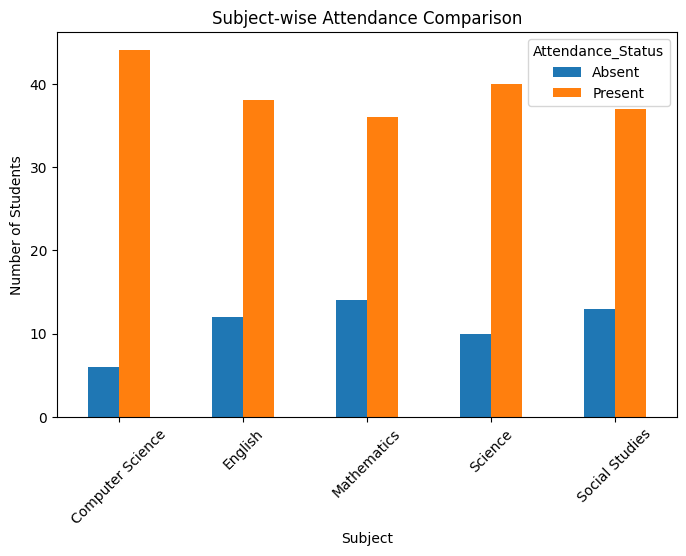

In [23]:
subject_attendance = (
    df.groupby('Subject')['Attendance_Status']
    .value_counts()
    .unstack(fill_value=0)
)

subject_attendance.plot(
    kind='bar',
    figsize=(8,5),
    title='Subject-wise Attendance Comparison'
)

plt.xlabel('Subject')
plt.ylabel('Number of Students')
plt.xticks(rotation=45)
plt.show()

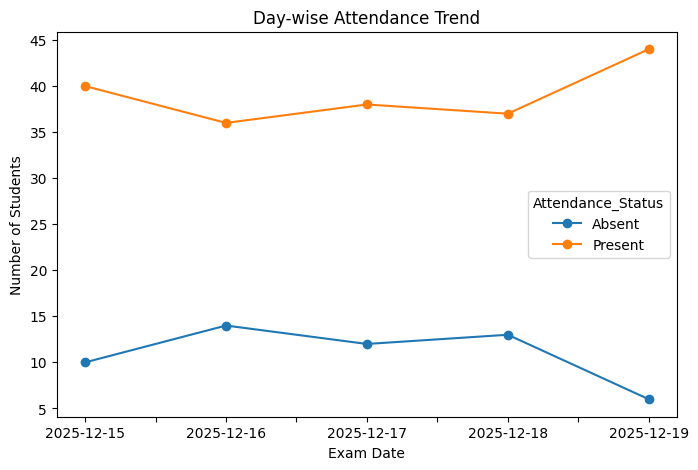

In [24]:
date_summary = (
    df.groupby('Exam_Date')['Attendance_Status']
    .value_counts()
    .unstack(fill_value=0)
)

date_summary.plot(
    kind='line',
    marker='o',
    figsize=(8,5),
    title='Day-wise Attendance Trend'
)

plt.xlabel('Exam Date')
plt.ylabel('Number of Students')
plt.show()

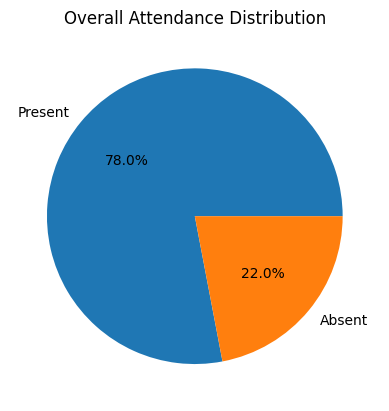

In [ ]:
attendance_count.plot(
    kind='pie',
    autopct='%1.1f%%',
    title='Overall Attendance Distribution'
)
plt.ylabel('')
plt.show()

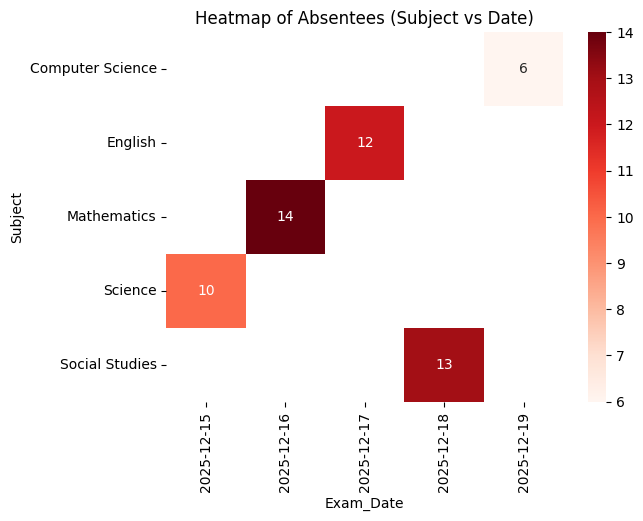

In [26]:
pivot_table = pd.pivot_table(
    df,
    values='Attendance_Status',
    index='Subject',
    columns='Exam_Date',
    aggfunc=lambda x: (x == 'Absent').sum()
)

sns.heatmap(pivot_table, annot=True, cmap='Reds')
plt.title('Heatmap of Absentees (Subject vs Date)')
plt.show()

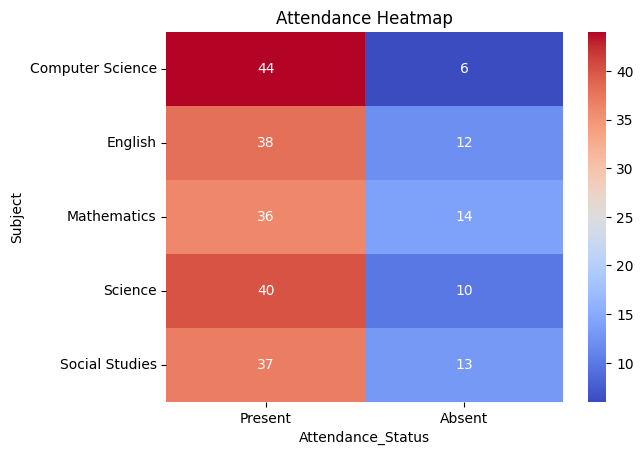

In [ ]:
sns.heatmap(subject_summary[['Present','Absent']], annot=True, cmap='coolwarm')
plt.title("Attendance Heatmap")
plt.show()

In [ ]:
high_absent_subjects = subject_summary[
    subject_summary['Absentee_Percentage'] > 20
]

high_absent_subjects

Attendance_Status,Absent,Present,Total,Absentee_Percentage
Subject,,,,
English,12,38,50,24.0
Mathematics,14,36,50,28.0
Social Studies,13,37,50,26.0


In [ ]:
summary_report = f"""
School Exam Attendance Analysis Report

Total Students: {total_students}
Total Subjects: {total_subjects}
Total Exam Days: {total_days}

Overall Attendance:
{attendance_count.to_string()}

Subject-wise Absentee Percentage:
{subject_summary['Absentee_Percentage'].to_string()}

Observation:
Subjects like Science and Mathematics show relatively higher absentee rates,
indicating possible exam stress or subject difficulty.
"""

print(summary_report)


School Exam Attendance Analysis Report

Total Students: 50
Total Subjects: 5
Total Exam Days: 5

Overall Attendance:
Attendance_Status
Present    195
Absent      55

Subject-wise Absentee Percentage:
Subject
Computer Science    12.0
English             24.0
Mathematics         28.0
Science             20.0
Social Studies      26.0

Observation:
Subjects like Science and Mathematics show relatively higher absentee rates,
indicating possible exam stress or subject difficulty.

